In [61]:

import matplotlib.pyplot as plt
import ast
import json
import numpy as np
import sys


In [62]:
#Get Accuracies
text_file = open("hm_accuracy.txt", "r")
accurs = text_file.read().split('\n')
accurs = accurs[:-1]
accurs = [float(x) for x in accurs]



In [63]:
#Get Gene Counts
with open("genecount_gtex.json") as f:
    gene_count_dict = json.load(f)

In [64]:
datasets = list(gene_count_dict.keys())

In [65]:
gene_counts = list(gene_count_dict.values())

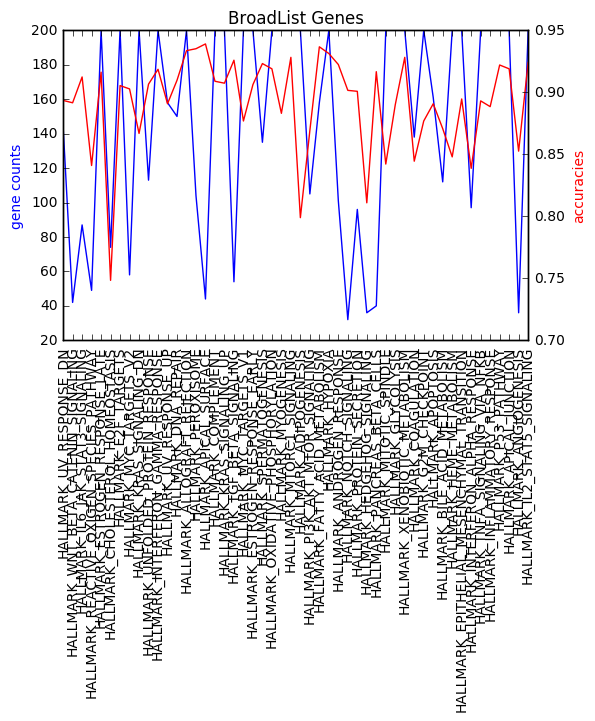

In [66]:
x = np.arange(len(datasets))
fig = plt.figure()
plt.title("BroadList Genes") 
plt.xticks(x,datasets)
plt.xticks(rotation=90)
ax1 = fig.add_subplot(111)
ax1.plot(x, gene_counts)
ax1.set_ylabel('gene counts',color='b')

ax2 = ax1.twinx()
ax2.plot(x, accurs, 'r-')
ax2.set_ylabel('accuracies', color='r')

 

plt.show()



In [37]:
ran_accurs = list()
#Get Accuracies
with open("random_accuracy.txt", "r") as f:
    for line in f:
        line = line.split('\t')
        line = line[1]
        ran_accurs.append(line)

ran_accurs = [x.replace('\n', '') for x in ran_accurs]
ran_accurs = [float(x) for x in ran_accurs]

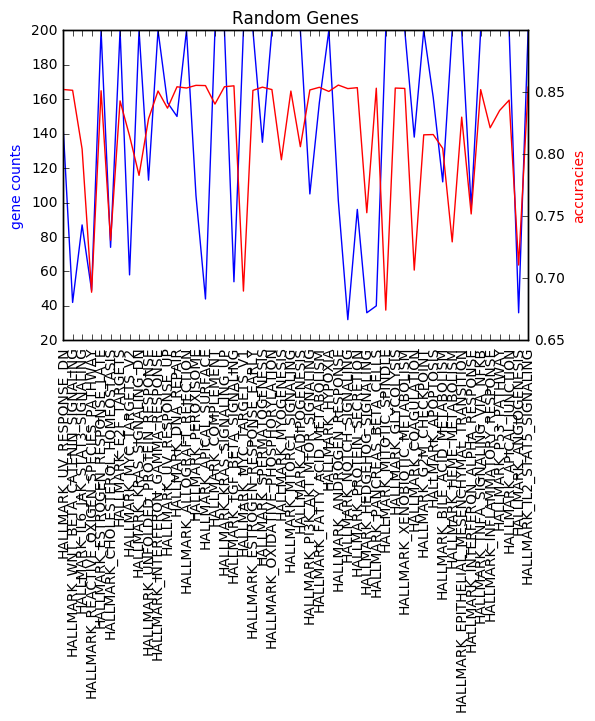

In [38]:
x = np.arange(len(datasets))
fig = plt.figure()
plt.title("Random Genes") 
plt.xticks(x,datasets)
plt.xticks(rotation=90)
ax1 = fig.add_subplot(111)
ax1.plot(x, gene_counts)
ax1.set_ylabel('gene counts',color='b')

ax2 = ax1.twinx()
ax2.plot(x, ran_accurs, 'r-')
ax2.set_ylabel('accuracies', color='r')

 

plt.show()

In [39]:
accurs

[0.893477,
 0.891548,
 0.912389,
 0.840988,
 0.916249,
 0.74836,
 0.905442,
 0.90274,
 0.866847,
 0.9066,
 0.918564,
 0.890776,
 0.909687,
 0.933616,
 0.93516,
 0.93902,
 0.908916,
 0.907372,
 0.925897,
 0.876882,
 0.906214,
 0.923196,
 0.91895,
 0.883057,
 0.928213,
 0.798919,
 0.869162,
 0.936704,
 0.931301,
 0.922424,
 0.901582,
 0.90081,
 0.810884,
 0.916635,
 0.842146,
 0.890004,
 0.928213,
 0.844462,
 0.876881,
 0.890776,
 0.870706,
 0.847935,
 0.894635,
 0.838672,
 0.893091,
 0.88846,
 0.922038,
 0.91895,
 0.852567,
 0.923968]

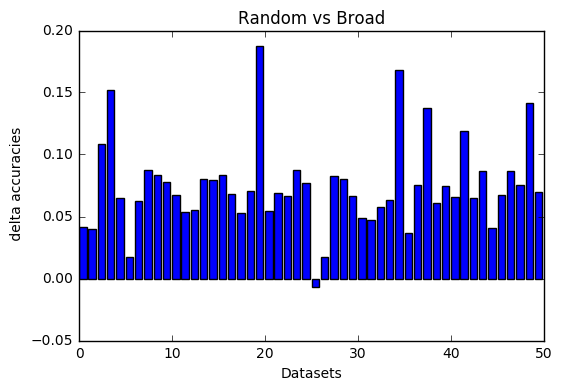

In [48]:
#write graph
x_range = np.arange(len(datasets))

accur_diff = [accurs[i]-ran_accurs[i] for i in range(len(ran_accurs))] 

plt.bar(x_range,accur_diff)
plt.title("Random vs Broad")
plt.ylabel(' delta accuracies')
plt.xlabel('Datasets')
plt.show()